In [12]:
from dataset import get_frames
from pathlib import Path
from tqdm.auto import tqdm
import numpy as np

In [13]:
data_dir = Path("../data/sibur_data/")
videos_paths = list(data_dir.rglob("*.mp4"))
len(videos_paths)

496

In [14]:
clips = [
    get_frames(vp, img_size=(232, 232))
    for vp in tqdm(videos_paths)
]

  0%|          | 0/496 [00:00<?, ?it/s]

In [15]:
# frames count 
cnt_frames = [len(c) for c in clips]
min(cnt_frames), max(cnt_frames), sum(cnt_frames) // len(cnt_frames)

(66, 513, 241)

<BarContainer object of 496 artists>

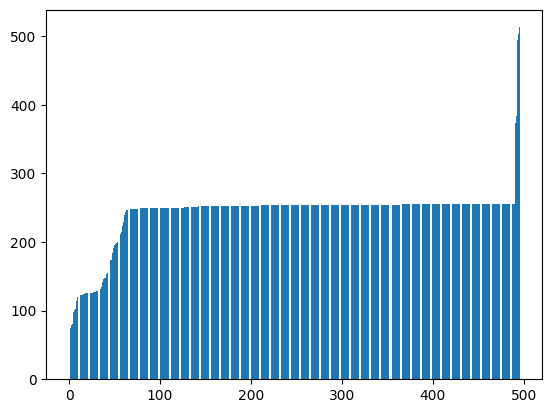

In [ ]:
from matplotlib import pyplot as plt
plt.bar(range(len(cnt_frames)), sorted(cnt_frames))

In [16]:
from collections import Counter

clips_classes = [
    vp.parent.name for vp in videos_paths
]
Counter(clips_classes).items()

dict_items([('no_action', 49), ('train_in_out', 66), ('bridge_up', 75), ('bridge_down', 306)])

In [17]:
frames_classes = [
    cls
    for c, cls in zip(clips, clips_classes)
    for _ in c
]
for n, cnt in Counter(frames_classes).items():
    print(n, "\t", cnt, "\t", cnt / len(frames_classes))

no_action 	 12640 	 0.10540448135825015
train_in_out 	 16449 	 0.13716758812198235
bridge_up 	 19095 	 0.15923248192529957
bridge_down 	 71735 	 0.5981954485944679


In [18]:
frames = np.concatenate(clips, axis=0)

In [ ]:
assert frames.shape[0] == len(frames_classes)

In [13]:
np.savez_compressed("../data/sibur_data/frames.npz", frames=frames, classes=frames_classes)

In [19]:
from sklearn.model_selection import train_test_split

train_idxs, val_idxs = train_test_split(range(len(frames_classes)), stratify=frames_classes)

In [20]:
np.savez_compressed("../data/sibur_data/train_idxs.npz", idxs=train_idxs)
np.savez_compressed("../data/sibur_data/test_idxs.npz", idxs=val_idxs)

: 

In [11]:
frames = metadata["frames"]

KeyboardInterrupt: 